In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy

## 问题1

In [2]:
def dft2D(f):
    h,w = f.shape # 获得图像行数、列数
    F = np.zeros(f.shape, dtype=complex)
    for i in range(h): # 对每一行进行一维傅立叶变换
        F[i,:] = np.fft.fft(f[i,:]) 
    for i in range(w): # 对每一列进行一维傅立叶变换
        F[:,i] = np.fft.fft(F[:,i])
    return F

# 问题2

In [3]:
def idft2D(F):
    h,w = F.shape
    F1 = np.conj(F) # 获得输入图像的共轭
    f = dft2D(F1) # 调用问题1定义的dft2D函数，对共轭图像做（正向）二维傅立叶变换
    f = np.conj(f) # 对傅立叶变换后的图像再取共轭
    f = f/(h*w) # 除以规范系数
    f = np.abs(f)
    return f

# 问题3

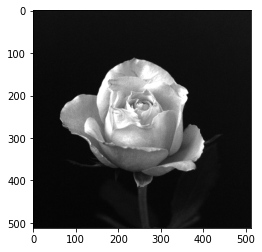

In [4]:
rose = r'/content/rose512.tif'
p1 = cv2.imread(rose,cv2.IMREAD_GRAYSCALE)
plt.imshow(p1,'gray') # 查看原始输入图像
plt.show()

In [5]:
def normalization(data): # 定义归一化函数
    range = np.max(data) - np.min(data)
    return (data - np.min(data)) / range

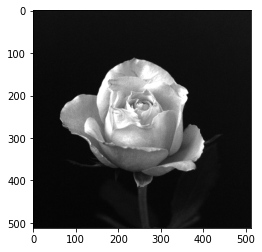

In [6]:
f = normalization(p1) # 对图像归一化
F = dft2D(f) # 二维傅立叶变换
g = idft2D(F) # 二维傅立叶逆变换
plt.imshow(g,'gray')
plt.show()

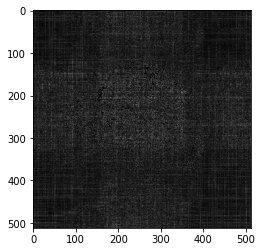

In [7]:
d = f - g # 差异图像
d = np.abs(d)
plt.imshow(d,'gray')
plt.show()

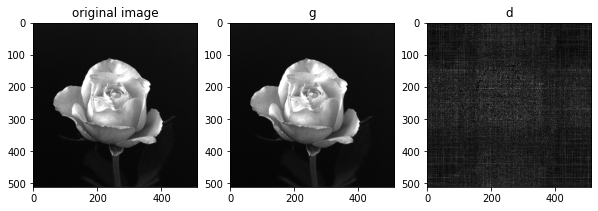

In [8]:
# 显示原始图像、经两次变 换后的图像和误差图像
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title('original image')
plt.imshow(p1,'gray')
plt.subplot(1,3,2)
plt.title('g')
plt.imshow(g,'gray')
plt.subplot(1,3,3)
plt.title('d')
plt.imshow(d,'gray')
# plt.savefig("1.png") 
plt.show()

## 问题4

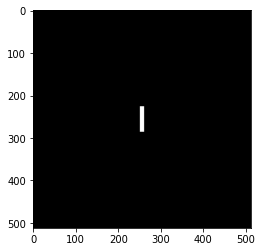

In [9]:
f = np.zeros((512,512)) # 先获得全为0的图像
f[226:286,251:261]=1 # 定义中心区域亮度为1
plt.imshow(f,'gray')
plt.show()

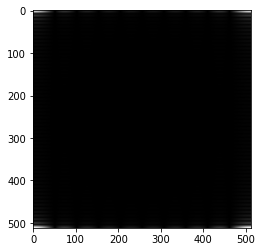

In [10]:
F1 = dft2D(f) # 对原始图像做二维傅立叶变换，注意四个角的光亮
plt.imshow(np.abs(F1),'gray')
plt.show()

In [11]:
def center(f): # 定义中心化函数
    img_c = np.zeros(f.shape)
    for i in range(f.shape[0]):
        for j in range(f.shape[1]):
            img_c[i, j] = f[i, j] * ((-1) ** (i + j)) # 利用复数的性质做变换
    return img_c

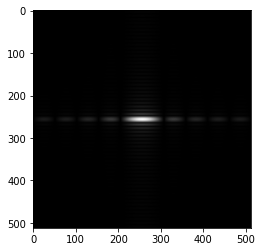

In [12]:
F2 = dft2D(center(f)) # 图像中心化
plt.imshow(np.abs(F2),'gray')
plt.show()

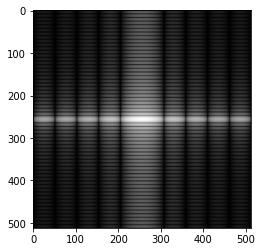

In [13]:
F3 = np.log(1+np.abs(F2)) # 对中心化后的图像做=log(1+abs(F))变换
plt.imshow(F3,'gray')
plt.show()

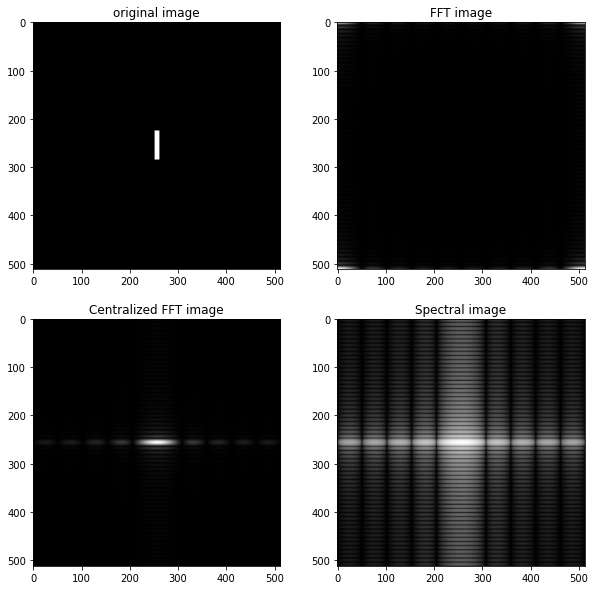

In [14]:
# 显示原始图像、FFT图像、中心化FFT图像和误差图像
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('original image')
plt.imshow(f,'gray')
plt.subplot(2,2,2)
plt.title('FFT image')
plt.imshow(np.abs(F1),'gray')
plt.subplot(2,2,3)
plt.title('Centralized FFT image')
plt.imshow(np.abs(F2),'gray')
plt.subplot(2,2,4)
plt.title('Spectral image')
plt.imshow(F3,'gray')
# plt.savefig("2.png") 
plt.show()

## 选做题

In [15]:
house = r'/content/house.tif'
house02 = r'/content/house02.tif'
lena = r'/content/lena_gray_512.tif'
lunar = r'/content/lunar_surface.tif'
characters = r'/content/Characters_test_pattern.tif'
p2 = cv2.imread(house,cv2.IMREAD_GRAYSCALE)
p3 = cv2.imread(house02,cv2.IMREAD_GRAYSCALE)
p4 = cv2.imread(lena,cv2.IMREAD_GRAYSCALE)
p5 = cv2.imread(lunar,cv2.IMREAD_GRAYSCALE)
p6 = cv2.imread(characters,cv2.IMREAD_GRAYSCALE)

In [16]:
# 检查图像尺寸是否为2的整数次幂
print(p2.shape)
print(p3.shape)
print(p4.shape)
print(p5.shape)
print(p6.shape)

(512, 512)
(600, 600)
(512, 512)
(474, 630)
(688, 688)


In [17]:
def pad(img): # 定义行像素填补函数
    h = w = 0
    i = 1
    while True: # 不断增加指数，使得填补后图像尺寸为2的整数次幂，且此时h,w首次不为0，退出循环
        if 2**i>=img.shape[0] and h==0:
            h = 2**i
        if 2**i>=img.shape[1] and w==0:
            w = 2**i
        if h!=0 and w!=0:
            break
        i=i+1 
    img2 = np.zeros((h,w))
    img2[(h-img.shape[0])//2:h-(h-img.shape[0])//2,(w-img.shape[1])//2:w-(w-img.shape[1])//2] = img  # 还原原始图像信息
    return img2

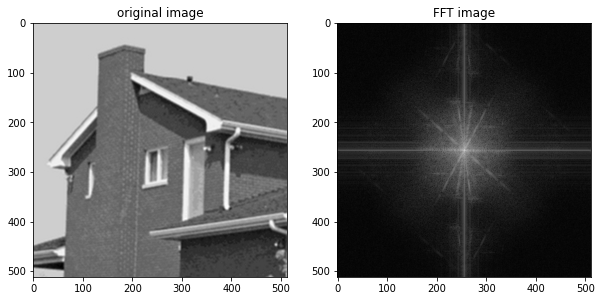

In [18]:
# 对于house(p2)不需要pad处理
f2 = normalization(p2)
f2 = center(f2)
F2 = dft2D(f2)
F2 = np.log(1+np.abs(F2))

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(p2,'gray')
plt.subplot(1,2,2)
plt.title('FFT image')
plt.imshow(np.abs(F2),'gray')
# plt.savefig("3.png") 
plt.show()

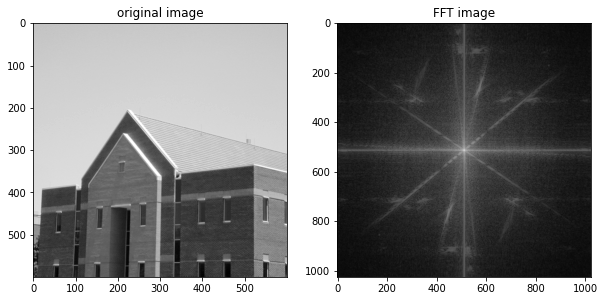

In [19]:
# 对于house02(p3)需要pad处理
f3 = normalization(pad(p3))
f3 = center(f3)
F3 = dft2D(f3)
F3 = np.log(1+np.abs(F3))

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(p3,'gray')
plt.subplot(1,2,2)
plt.title('FFT image')
plt.imshow(np.abs(F3),'gray')
# plt.savefig("4.png") 
plt.show()

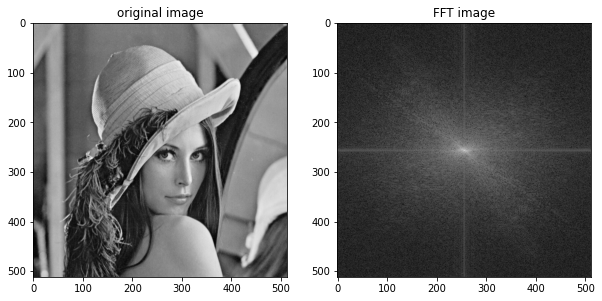

In [20]:
# 对于lena(p4)不需要pad处理
f4 = normalization(p4)
f4 = center(f4)
F4 = dft2D(f4)
F4 = np.log(1+np.abs(F4))

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(p4,'gray')
plt.subplot(1,2,2)
plt.title('FFT image')
plt.imshow(np.abs(F4),'gray')
# plt.savefig("5.png") 
plt.show()

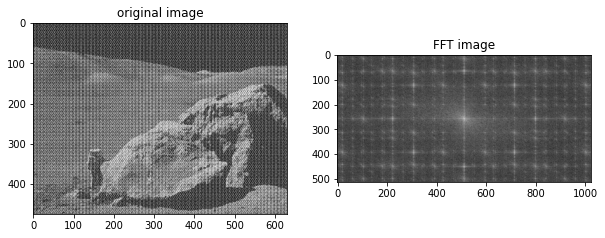

In [21]:
# 对于lunar(p5)需要pad处理
f5 = normalization(pad(p5))
f5 = center(f5)
F5 = dft2D(f5)
F5 = np.log(1+np.abs(F5))

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(p5,'gray')
plt.subplot(1,2,2)
plt.title('FFT image')
plt.imshow(np.abs(F5),'gray')
# plt.savefig("6.png") 
plt.show()

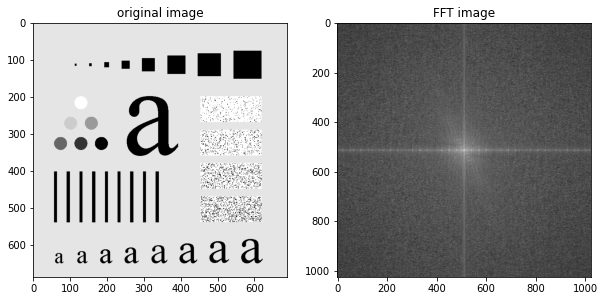

In [22]:
# 对于characters(p6)需要pad处理
f6 = normalization(pad(p6))
f6 = center(f6)
F6 = dft2D(f6)
F6 = np.log(1+np.abs(F6))

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(p6,'gray')
plt.subplot(1,2,2)
plt.title('FFT image')
plt.imshow(np.abs(F6),'gray')
# plt.savefig("7.png") 
plt.show()